In [27]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from astropy.visualization.wcsaxes import WCSAxes
from astropy.coordinates import SkyCoord
import os
from scipy import ndimage
from astropy.stats import sigma_clip
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from lightkurve import MPLSTYLE
import lightkurve as lk
from astropy.stats import bayesian_blocks
import subprocess
from scipy.optimize import curve_fit

In [ ]:
os.chdir('/users/ben/desktop/LSR/fits_files')
fits_file = 'small_pa30_tesscut.fits'

with fits.open(fits_file, mode="readonly") as hdulist:
    time = hdulist[1].data['TIME']
    pdcsap = hdulist[1].data['FLUX']

target_pix_flux = []
for i in range(len(pdcsap)):
    flux = pdcsap[i][2][23]
    target_pix_flux.append(flux)

In [32]:
dim1 = 25
dim = 5
pxl =  dim * dim
fig, ax = plt.subplots(dim, dim, figsize=(8, 8), facecolor='w', edgecolor='k', sharex=True, sharey=True)
fig.subplots_adjust(hspace = .001, wspace=.001)
fig.text(0.5, 0.04, r'Frequency ${\bf (\mu Hz)}$', fontsize = 16, fontweight="bold", ha='center')
fig.text(0.02, 0.5, r'Normalized Power', fontsize = 16, fontweight="bold", va='center', rotation='vertical')
fig.suptitle('%s'%(object), fontsize = 20, fontweight="bold")
ax = ax.ravel()

tpf1=tpf.cutout(center=(12.42653281, 12.63777338),size=dim)

tstart1 =  2501
tstop1 =  2511
tstart2 =  2515
tstop2 =  2524
filter_range1  = [(lc_unclean.time.value >= tstart1) & (lc_unclean.time.value <= tstop1)][0]
filter_range2  = [(lc_unclean.time.value >= tstart2) & (lc_unclean.time.value <= tstop2)][0]
filter_range = []

for i in range(0, len(lc_unclean.time)):
    filter_range.append(any([filter_range1[i], filter_range2[i]]))
time_filter = lc_unclean.to_table()['time'].value[filter_range]
flux_filter = lc_unclean.to_table()['flux'][filter_range]
flux_err_filter = lc_unclean.to_table()['flux_err'][filter_range]
lc_clean1 = lk.LightCurve(time=time_filter, flux=flux_filter, flux_err=flux_err_filter)
lc_clean = lc_clean1.flatten(window_length=101, polyorder=2, return_trend=False, break_tolerance=5, niters=3, sigma=5)
flx = np.median(lc_clean1.flux)
flx_err = np.median(lc_clean1.flux_err)

pg = lc_clean.to_periodogram(method='lombscargle', normalization= 'psd')


In [73]:
os.chdir('/users/ben/desktop/LSR/fits_files')
tpf=lk.TessTargetPixelFile('small_pa30_tesscut.fits')
lc_unclean = tpf.to_lightcurve().remove_nans().remove_outliers(sigma=5)

/Users/ben/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ben/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


0 74


/Users/ben/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ben/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


1 74


/Users/ben/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ben/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


2 74


/Users/ben/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ben/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


3 74


/Users/ben/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ben/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


4 74


/Users/ben/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ben/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


5 74


/Users/ben/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ben/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


6 74


/Users/ben/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ben/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


7 74


/Users/ben/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ben/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


8 74


/Users/ben/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ben/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


9 74


/Users/ben/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ben/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


10 74


/Users/ben/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ben/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


11 74


/Users/ben/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ben/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


12 74


/Users/ben/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ben/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


13 74


/Users/ben/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ben/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


14 74


/Users/ben/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ben/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


15 74


/Users/ben/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ben/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


16 74


/Users/ben/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ben/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


17 74


/Users/ben/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ben/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


18 74


/Users/ben/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ben/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


19 74


/Users/ben/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ben/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


20 74


/Users/ben/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ben/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


21 74


/Users/ben/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ben/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


22 74


/Users/ben/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ben/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


23 74


/Users/ben/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ben/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


24 74


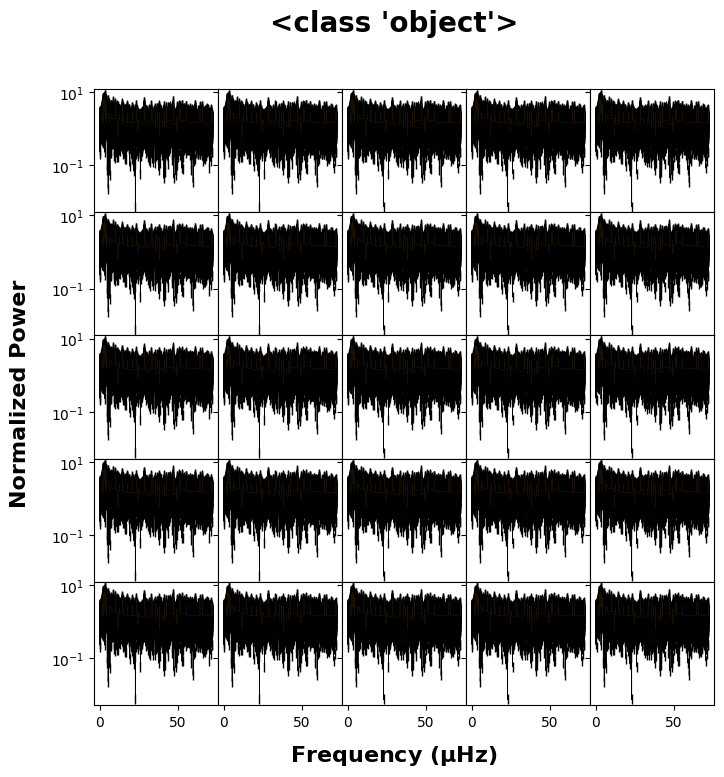

In [74]:
dim1 = 25
dim = 5
pxl =  dim * dim
fig, ax = plt.subplots(dim, dim, figsize=(8, 8), facecolor='w', edgecolor='k', sharex=True, sharey=True)
fig.subplots_adjust(hspace = .001, wspace=.001)
fig.text(0.5, 0.04, r'Frequency ${\bf (\mu Hz)}$', fontsize = 16, fontweight="bold", ha='center')
fig.text(0.02, 0.5, r'Normalized Power', fontsize = 16, fontweight="bold", va='center', rotation='vertical')
fig.suptitle('%s'%(object), fontsize = 20, fontweight="bold")
ax = ax.ravel()

icnt=0
for j in range(0, dim):
    for i in range(0, dim):
        mask = []
        for j1 in range(0, dim):
            row = []
            for i1 in range(0, dim):
                col_range = [(i1 >= i) & (i1 <= i)][0]
                row_range = [(j1 >= dim-j-1) & (j1 <= dim-j-1)][0]
                if all([col_range, row_range]):
                    row.append(True)
                else:
                    row.append(False)
            mask.append(row)
        target_mask = np.array(mask)
        ra = tpf1.get_coordinates(cadence=0)[0][dim-j-1,i]
        dec = tpf1.get_coordinates(cadence=0)[1][dim-j-1,i]
        lc = tpf1.to_lightcurve(aperture_mask = target_mask)
        lc_unclean = lc.remove_nans().remove_outliers(sigma=5)
        tstart1 =  1683.5  #sec-14
        tstop1 =  1690  #sec-14
        tstart2 =  1696  #sec-14
        tstop2 =  1704  #sec-14
        filter_range1  = [(lc_unclean.time.value >= tstart1) & (lc_unclean.time.value <= tstop1)][0]
        filter_range2  = [(lc_unclean.time.value >= tstart2) & (lc_unclean.time.value <= tstop2)][0]
        filter_range = []
        for i in range(0, len(lc_unclean.time)):
            filter_range.append(any([filter_range1[i], filter_range2[i]]))
        time_filter = lc_unclean.to_table()['time'].value[filter_range]# + random_signs*np.random.poisson(timedel/2)
        flux_filter = lc_unclean.to_table()['flux'][filter_range]
        flux_err_filter = lc_unclean.to_table()['flux_err'][filter_range]
        lc_clean1 = lk.LightCurve(time=time_filter, flux=flux_filter, flux_err=flux_err_filter)
        #lc_clean = lc_clean1.flatten(window_length=101, polyorder=2, return_trend=False, break_tolerance=5, niters=3, sigma=5)
        flx = np.median(lc_clean1.flux)
        flx_err = np.median(lc_clean1.flux_err)
#        ax[icnt].plot(lc_clean.time, lc_clean.flux, 'k', linewidth=0.1, ms=7, label="%.4f  \n %.4f"%(ra, dec))
        pg = lc_clean.to_periodogram(method='lombscargle')#, minimum_period = 0.1, maximum_period = 2)
        #print(pg.frequency.value[0])
        ax[icnt].plot(pg.frequency, pg.power.value/np.std(pg.power.value), 'k|', linewidth=0.1, ms=7, label= "%2d"%(icnt+1))
        ax[icnt].step(pg.frequency, pg.power.value/np.std(pg.power.value), color='k', linewidth=0.7, where='mid', label=None)
        #ax[icnt].set_xscale('log')
        ax[icnt].set_yscale('log')
        #ax[icnt].axis(xmin=1,xmax=290, ymin=9e-6, ymax=9e3)
        #ax[icnt].xaxis.set_major_locator(plt.FixedLocator([0,100,200]))
        #ax[icnt].yaxis.set_major_locator(plt.LogLocator(100))
        #ax1 = ax[icnt].twiny()
        #ax1.axis(xmax=float(1e6/(1*3600)),xmin=float(1e6/(290*3600)))
        #ax1.xaxis.set_major_locator(plt.FixedLocator([100,200]))
        #ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: "%.1f"%(1.0e6/(3600*x))))
        #if any([icnt+1 == 1, icnt+1 == 2,icnt+1 == 3, icnt+1 == 4, icnt+1 == 5]):
        #    ax1.xaxis.set_tick_params(labeltop=True)
        #else:
        #    ax1.xaxis.set_tick_params(labeltop=False)
        #ax[icnt].legend(markerscale=0.01, handletextpad=0.1)
        edges = bayesian_blocks(pg.period.value, pg.power.value/np.std(pg.power.value), sigma=np.sqrt(pg.power.value/np.std(pg.power.value)), fitness='measures', p0=0.05)
        x = (edges[1:]+edges[:-1])/2
        print(icnt, len(x))
               
        apower = []
        for i1 in range(0, len(x)):
            xx = []
            for ii in range(0, len(pg.power.value)):
                if (pg.period.value[ii] >= edges[i1]) & (pg.period.value[ii] <= edges[i1+1]):
                    xx.append(pg.power.value[ii]/np.std(pg.power.value))
            apower.append(np.mean(xx))
        ax[icnt].step(1/edges, np.append(apower, apower[-1]), color='orange', linewidth=0.5, alpha=0.1, where='post')
        icnt=icnt+1
#plt.savefig('pixel_%s_%s_%s.eps'%(sector, dim, flag1), dpi=300, format='eps', bbox_inches='tight')
#plt.draw()
plt.show()

In [41]:
os.chdir('/users/ben/desktop/LSR/fits_files')
tpf=lk.TessTargetPixelFile('abell30_tesscut.fits')

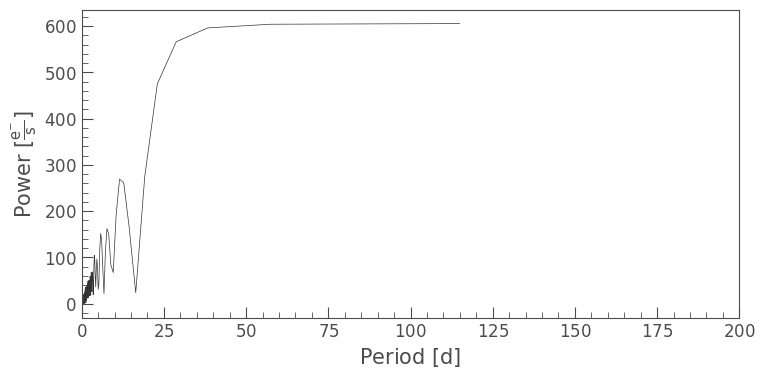

In [72]:
lc = tpf.to_lightcurve().remove_nans().remove_outliers(sigma=5)

tstart1 =  2501
tstop1 =  2511
tstart2 =  2515
tstop2 =  2524
filter_range1  = [(lc.time.value >= tstart1) & (lc.time.value <= tstop1)][0]
filter_range2  = [(lc.time.value >= tstart2) & (lc.time.value <= tstop2)][0]
filter_range = []

for i in range(0, len(lc.time)):
    filter_range.append(any([filter_range1[i], filter_range2[i]]))
time_filter = lc.to_table()['time'].value[filter_range]
flux_filter = lc.to_table()['flux'][filter_range]
flux_err_filter = lc.to_table()['flux_err'][filter_range]
lc_clean1 = lk.LightCurve(time=time_filter, flux=flux_filter, flux_err=flux_err_filter)
lc_clean = lc_clean1.flatten(window_length=101)#, polyorder=2, return_trend=False, break_tolerance=5, niters=3, sigma=5)
flx = np.median(lc_clean1.flux)
flx_err = np.median(lc_clean1.flux_err)
pg = lc_clean1.to_periodogram(method='lombscargle')

pg.plot(view='period')
plt.xlim(0,200)
plt.show()